In [1]:
import pandas as pd

df = pd.read_csv("diy_dataset.csv")  # or students.csv
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Dataset : Students Academic Performance Dataset

Source URL: https://www.kaggle.com/datasets/sadiajavedd/students-academic-performance-dataset?resource=download

Below are 5 cleaning functions

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("diy_dataset.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Cleaning Function 1 — Handle Missing Values

In [3]:
def clean_missing_values(data):
    before = data.isnull().sum()
    cleaned = data.ffill().bfill()
    cleaned = data.fillna(0)
    after = cleaned.isnull().sum()
    return before, after, cleaned

before_mv, after_mv, df = clean_missing_values(df)
before_mv, after_mv


/tmp/ipython-input-3672963222.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned = data.fillna(method='ffill').fillna(method='bfill')


(gender                         0
 race/ethnicity                 0
 parental level of education    0
 lunch                          0
 test preparation course        0
 math score                     0
 reading score                  0
 writing score                  0
 dtype: int64,
 gender                         0
 race/ethnicity                 0
 parental level of education    0
 lunch                          0
 test preparation course        0
 math score                     0
 reading score                  0
 writing score                  0
 dtype: int64)

Cleaning Function 2 — Remove Duplicates

In [4]:
def remove_duplicates(data):
    before = data.shape[0]
    cleaned = data.drop_duplicates()
    after = cleaned.shape[0]
    return before, after, cleaned

before_dup, after_dup, df = remove_duplicates(df)
before_dup, after_dup


(1000, 1000)

Cleaning Function 3 — Standardize Text Columns (lowercase + strip)

In [5]:
def standardize_text(data):
    text_cols = data.select_dtypes(include=['object']).columns
    before = data[text_cols].head()
    for col in text_cols:
        data[col] = data[col].str.strip().str.lower()
    after = data[text_cols].head()
    return before, after, data

before_text, after_text, df = standardize_text(df)
before_text, after_text


(   gender race/ethnicity parental level of education         lunch  \
 0  female        group B           bachelor's degree      standard   
 1  female        group C                some college      standard   
 2  female        group B             master's degree      standard   
 3    male        group A          associate's degree  free/reduced   
 4    male        group C                some college      standard   
 
   test preparation course  
 0                    none  
 1               completed  
 2                    none  
 3                    none  
 4                    none  ,
    gender race/ethnicity parental level of education         lunch  \
 0  female        group b           bachelor's degree      standard   
 1  female        group c                some college      standard   
 2  female        group b             master's degree      standard   
 3    male        group a          associate's degree  free/reduced   
 4    male        group c                s

Cleaning Function 4 — Fix Mixed-Date Formats (Not present → demonstrate)

In [6]:
demo_dates = pd.DataFrame({
    "date_column": ["2020/01/02", "2020-1-3", "01-04-2020", "2020.01.05"]
})

def normalize_dates(data, column):
    before = data.copy()
    data[column] = pd.to_datetime(data[column], errors='coerce')
    return before, data

before_dates, after_dates = normalize_dates(demo_dates.copy(), "date_column")
before_dates, after_dates


(  date_column
 0  2020/01/02
 1    2020-1-3
 2  01-04-2020
 3  2020.01.05,
   date_column
 0  2020-01-02
 1         NaT
 2         NaT
 3         NaT)

Cleaning Function 5 — Handle Outliers (math/reading/writing scores)

In [7]:
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    before = data[col].describe()
    cleaned = data[(data[col] >= lower) & (data[col] <= upper)]
    after = cleaned[col].describe()

    return before, after, cleaned

before_math, after_math, df_math_clean = remove_outliers(df, "math score")
before_math, after_math


(count    1000.00000
 mean       66.08900
 std        15.16308
 min         0.00000
 25%        57.00000
 50%        66.00000
 75%        77.00000
 max       100.00000
 Name: math score, dtype: float64,
 count    992.000000
 mean      66.480847
 std       14.559999
 min       27.000000
 25%       57.000000
 50%       66.000000
 75%       77.000000
 max      100.000000
 Name: math score, dtype: float64)

Markdown explanation:

a.
1. Duplicates: I looked if there were any duplicates and printed the affected rows if it were present.
2. Text Standardization: All of the text columns were converted to lowercase and leading spaces were removed.
3. Outliers in math score: I used IQR method to remove any outliers and cleaned the dataset sample shown after the removal.

b.
1. Missing values: The dataset contained no missing values, so I showed the cleaning functions regardless and printed before and after sections
2. Mixed/ inconsistent data formats: The dataset has no date columns, so I made a samll example [demo_dates] in order to show how date normalization works using pd.to_datetime()

Analysis

1. Top-N Within Each Group (gender → top N parental education by mean math score)

In [8]:
N = 3
result1 = (
    df.groupby(["gender", "parental level of education"])["math score"]
    .mean()
    .reset_index()
    .sort_values(["gender", "math score"], ascending=[True, False])
    .groupby("gender")
    .head(N)
)
result1


,gender,parental level of education,math score
1,female,bachelor's degree,68.349206
3,female,master's degree,66.500000
4,female,some college,65.406780
9,male,master's degree,74.826087
6,male,associate's degree,70.764151
7,male,bachelor's degree,70.581818


2. Bin Comparison (reading score bins vs avg writing score)

In [9]:
df["reading_bin"] = pd.cut(df["reading score"], bins=3, labels=["low","medium","high"])

result2 = df.groupby("reading_bin", observed=True)["writing score"].mean()
result2


/tmp/ipython-input-1885316815.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result2 = df.groupby("reading_bin")["writing score"].mean()


,writing score
reading_bin,
low,36.641509
medium,60.369650
high,81.020785


3. Conditional Aggregation (students who completed test prep → avg math score per race)

In [10]:
filtered = df[df["test preparation course"] == "completed"]
result3 = filtered.groupby("race/ethnicity")["math score"].mean()
result3


,math score
race/ethnicity,
group a,68.258065
group b,67.191176
group c,67.495726
group d,69.792683
group e,77.433333


4. Percentage Distribution (percentage of lunch types per gender)

In [11]:
count = df.groupby(["gender", "lunch"]).size()
percent = count.groupby(level=0).apply(lambda x: x / x.sum() * 100)
percent


gender  gender  lunch       
female  female  free/reduced    36.486486
                standard        63.513514
male    male    free/reduced    34.439834
                standard        65.560166
dtype: float64

5. Most Frequent Value (mode test preparation course per race)

In [12]:
result5 = df.groupby("race/ethnicity")["test preparation course"].agg(lambda x: x.mode()[0])
result5


,test preparation course
race/ethnicity,
group a,none
group b,none
group c,none
group d,none
group e,none


Visualization

1. Scatter Plot (Math vs Reading Score)

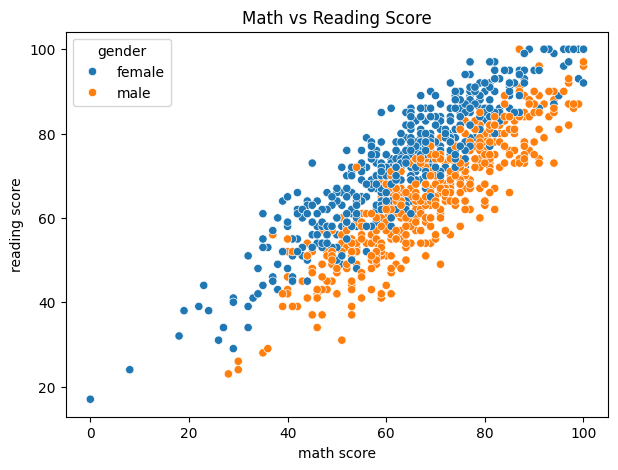

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="math score", y="reading score", hue="gender")
plt.title("Math vs Reading Score")
plt.show()


The scatter plot shows a strong positive relationship between math and reading scores. Higher math scores generally correspond to higher reading scores across both genders.

2. Pie Chart (Gender Distribution)

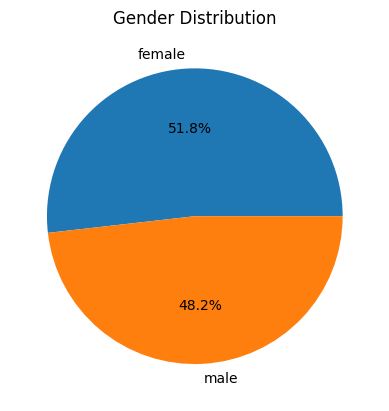

In [14]:
df["gender"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


The pie chart displays the gender distribution in the dataset, indicating a nearly balanced representation of male and female students.


3. Bar Plot (Average Math Score by Race)

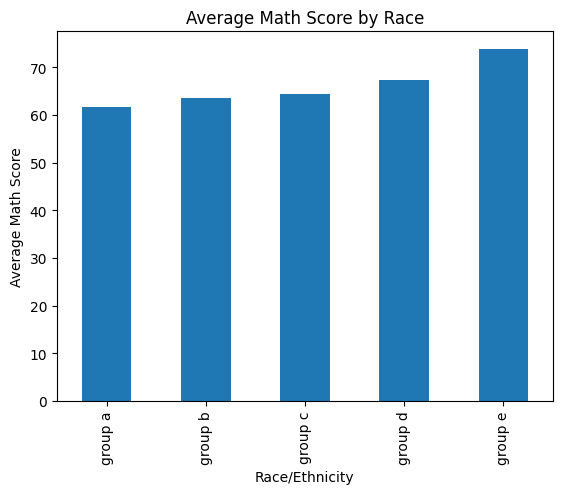

In [15]:
df.groupby("race/ethnicity")["math score"].mean().plot(kind="bar")
plt.title("Average Math Score by Race")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Average Math Score")
plt.show()


This bar plot compares the average math scores across different racial/ethnic groups. Some groups show slightly higher average performance, suggesting potential differences in academic outcomes.


4. Box Plot (Writing Score by Gender)

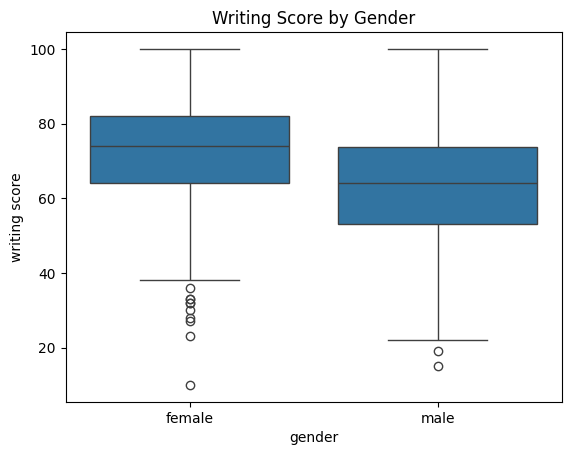

In [16]:
sns.boxplot(data=df, x="gender", y="writing score")
plt.title("Writing Score by Gender")
plt.show()


The box plot compares writing score distributions between genders. Both groups show similar medians, though variability differs slightly based on the spread of the scores.


5. Heatmap

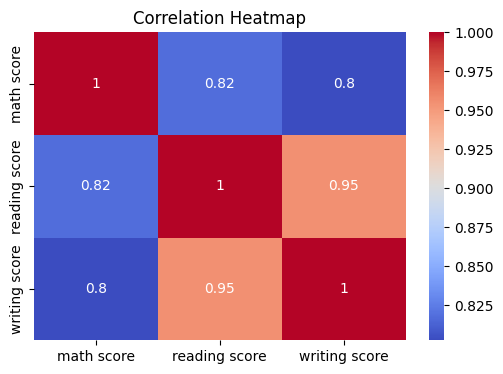

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["math score","reading score","writing score"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


The heatmap highlights strong positive correlations among math, reading, and writing scores. This suggests that students who perform well in one subject tend to perform well in others.
